In [3]:
#import all the libraries
from modsim import *
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [4]:

#Stocks: Uninfected Lymphocytes (R), Latently Infected Lymphocytes (L), Infected Lymphocytes (E), Virions (V)

#Parameters: Uninfected Lymphocyte Production (Gamma), Lymphocyte Activation Rate (Tau), Lymphocyte natural death rate (Mu), Infection Rate Modifier (Beta), Proportion of cells latently infected (Rho), Latently Infected Activation Rate (Alpha), Infected Death Rate (Delta), Free Virion Production Rate (Pi), Free Virion Removal Rate (Sigma)

#Gamma * Tau is constant, Infection Rate = Beta * V

#Differential Equations

#dR/dt = Gamma*Tau - Mu*R - Beta*R*V

#dL/dt = Rho*Beta*R*V - Mu*L - Alpha*L

#dE/dt = (1 - Rho)*Beta*R*V + Alpha*L - Delta*E

#dV/dt = Pi*E - Sigma*V


In [5]:
init = State(R = 200,
             L = 0,
             E = 0,
             V = 4e-7)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [6]:
system = System(gamma = 1.36,
             tau   = .2,
             mu    = 1.36*10**-3,
             beta  = .00027,
             rho   = .1,
             alpha = 3.6*10**-2,
             delta = .33,
             pi    = 100, 
             sigma = 2,
             p=.1,
             q=.9,
             )

,values
gamma,1.36000
tau,0.20000
mu,0.00136
beta,0.00027
rho,0.10000
alpha,0.03600
delta,0.33000
pi,100.00000
sigma,2.00000
p,0.10000


In [7]:
def update_func(state, system):

    dR = system.gamma*system.tau - system.mu*state.R - system.beta*state.R*state.V
    dL = system.rho*system.beta*state.R*state.V - system.mu*state.L - system.alpha*state.L
    dE = (1 - system.rho)*system.beta*state.R*state.V + system.alpha*state.L - system.delta*state.E
    dV = system.pi*state.E - system.sigma*state.V
    dt = .1
    
    new_state = state

    new_state.R += dR * dt
    new_state.L += dL * dt
    new_state.E += dE * dt
    new_state.V += dV * dt
    
    return new_state

In [13]:
def run_simulation(system, update_func):
    
    frame = TimeFrame(columns = init.index)
    frame.row[0] = init
    
    for t in linrange(0, 200,.1):
        frame.row[t+.1] = update_func(frame.row[t], system)
        
    return frame

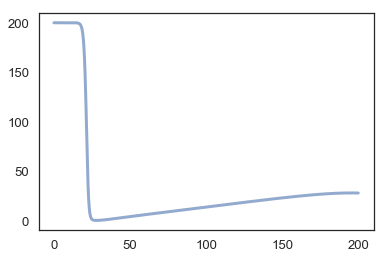

In [14]:
results = run_simulation(system, update_func) #plots R,L, and E
plot(results.R)

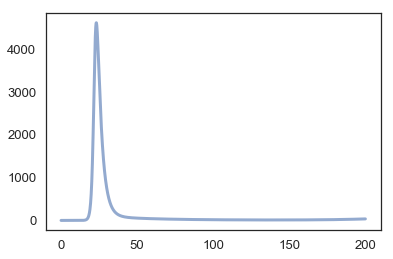

In [15]:
plot(results.V)

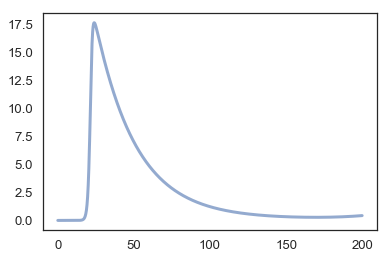

In [16]:
plot(results.L)

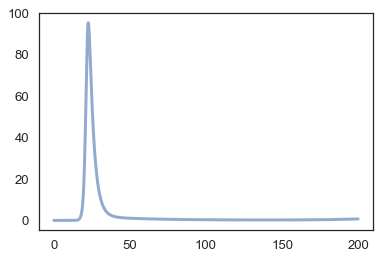

In [17]:
plot(results.E)